In [1]:
# Loading some modules, settings some defaults
%matplotlib inline
import grale.lenses as lenses
import grale.renderers as renderers
import grale.feedback as feedback
import grale.images as images
import grale.cosmology as cosmology
import grale.plotutil as plotutil
import grale.inversion as inversion
from grale.constants import *
import numpy as np
import matplotlib.pyplot as plt

feedback.setDefaultFeedback("none")
renderers.setDefaultLensPlaneRenderer("threads")
renderers.setDefaultMassRenderer("threads")
plotutil.setDefaultAngularUnit(ANGLE_ARCMIN)

In [2]:
# For that article (http://adsabs.harvard.edu/abs/2006MNRAS.367.1209L),
# a flat cosmological model with H0 = 70 km s^-1 Mpc-1 and Omega_m = 1
# was used. 
cosm = cosmology.Cosmology(0.7, 1, 0, 0)
cosmology.setDefaultCosmology(cosm)

In [3]:
# The simulated mass distribution was at z = 0.45, and was a combination
# of various Plummer mass distributions. In the list below, the mass is
# in units of solar masses, and width and x/y position are in arcsec
zd = 0.45
Dd = cosm.getAngularDiameterDistance(zd)

params = [
 {'mass': 6.50215e13, 'width': 20.0544, 'x': 16.9869, 'y': -30.5377},
 {'mass': 4.55026e13, 'width': 52.5072, 'x': -26.7969, 'y': -1.52161},
 {'mass': 6.35304e13, 'width': 51.5255, 'x': 9.29092, 'y': -13.7629},
 {'mass': 3.99434e13, 'width': 20.2676, 'x': -29.064, 'y': -24.7408},
 {'mass': 3.27149e13, 'width': 40.6638, 'x': -28.816, 'y': 11.6619},
 {'mass': 5.59774e13, 'width': 42.7583, 'x': 31.9316, 'y': -24.5619},
 {'mass': 3.76128e13, 'width': 56.549, 'x': -4.93048, 'y': -2.05178},
 {'mass': 5.59212e13, 'width': 56.1952, 'x': 30.5529, 'y': -23.6651},
 {'mass': 6.73021e13, 'width': 55.2242, 'x': 29.1413, 'y': -9.17284},
 {'mass': 4.05120e13, 'width': 52.9927, 'x': -13.3087, 'y': -11.5211},
 {'mass': 6.27982e13, 'width': 45.4031, 'x': 26.2526, 'y': -23.2311},
 {'mass': 5.44979e13, 'width': 50.7048, 'x': -17.7786, 'y': -9.03321},
 {'mass': 3.35238e13, 'width': 21.8691, 'x': 14.924, 'y': -5.29904},
 {'mass': 5.86743e13, 'width': 21.998, 'x': 17.8675, 'y': 26.8836},
 {'mass': 5.57359e13, 'width': 13.7437, 'x': 11.2577, 'y': 27.5349},
 {'mass': 3.80791e13, 'width': 30.7618, 'x': -15.7952, 'y': -27.7587},
 {'mass': 5.71262e13, 'width': 23.5324, 'x': 28.1451, 'y': 15.4289},
 {'mass': 5.61401e13, 'width': 23.946, 'x': -14.1163, 'y': -9.39147},
 {'mass': 3.73807e13, 'width': 17.0916, 'x': -9.84818, 'y': 12.0509},
 {'mass': 4.15503e13, 'width': 16.6987, 'x': -8.60827, 'y': -17.034},
 {'mass': 5.74726e13, 'width': 24.3974, 'x': -6.56477, 'y': 1.59908},
 {'mass': 3.11558e13, 'width': 27.8624, 'x': 3.97222, 'y': -17.0944},
 {'mass': 3.77232e13, 'width': 18.2256, 'x': -26.2303, 'y': 8.28084}]

# Let's convert the units in the list to units that the lens model
# needs
for d in params:
    d['mass'] *= MASS_SUN
    for k in [ 'width', 'x', 'y' ]: d[k] *= ANGLE_ARCSEC

# Create the lens with these parameters
lens = lenses.MultiplePlummerLens(Dd, params)

In [4]:
# Plot the mass density
lensInfo = plotutil.LensInfo(lens, size=3*ANGLE_ARCMIN)
plotutil.plotDensityInteractive(lensInfo);

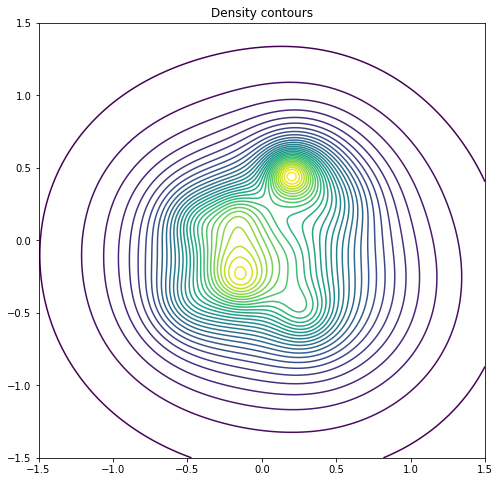

In [5]:
# Let's also create a contour plot
plt.figure(figsize=(8,8))
plt.contour(lensInfo.getXPointCoordinates()/ANGLE_ARCMIN, 
            lensInfo.getYPointCoordinates()/ANGLE_ARCMIN, 
            lensInfo.getDensityPoints(), 32)
plt.gca().set_title("Density contours");

In [6]:
# This is a list for the sources that were used in the simulation,
# radius and x/y position are in arcsec.
sources = [
 {'z': 2.23,
  'radius': 0.490414,
  'ecc': 0.747943,
  'angle': 214.454,
  'x': -16.9952,
  'y': 8.01653},
 {'z': 3.36,
  'radius': 0.577637,
  'ecc': 0.643668,
  'angle': 212.86,
  'x': 2.50191,
  'y': 2.01484},
 {'z': 1.67,
  'radius': 0.601147,
  'ecc': 0.482835,
  'angle': 168.899,
  'x': -14.0216,
  'y': -17.4727},
 {'z': 2.19,
  'radius': 0.740143,
  'ecc': 0.708126,
  'angle': 244.53,
  'x': 15.1337,
  'y': -13.2455},
 {'z': 3.90,
  'radius': 0.837893,
  'ecc': 0.92044,
  'angle': 212.467,
  'x': -21.9282,
  'y': 22.061},
 {'z': 1.59,
  'radius': 0.748018,
  'ecc': 0.908355,
  'angle': 311.03,
  'x': -1.35249,
  'y': 7.02918},
 {'z': 2.98,
  'radius': 0.561942,
  'ecc': 0.926724,
  'angle': 257.85,
  'x': 17.4939,
  'y': -17.9272},
 {'z': 3.93,
  'radius': 0.755722,
  'ecc': 0.48573,
  'angle': 183.976,
  'x': -0.394342,
  'y': 9.6253},
 {'z': 2.13,
  'radius': 0.400487,
  'ecc': 0.89966,
  'angle': 97.7608,
  'x': 22.196,
  'y': 22.3759},
 {'z': 3.05,
  'radius': 0.458555,
  'ecc': 0.533536,
  'angle': 359.419,
  'x': 11.1569,
  'y': 15.8324},
 {'z': 2.89,
  'radius': 0.712679,
  'ecc': 0.416704,
  'angle': 235.368,
  'x': -11.9113,
  'y': -22.0008},
 {'z': 1.93,
  'radius': 0.734728,
  'ecc': 0.761101,
  'angle': 94.331,
  'x': 11.9666,
  'y': -6.82746},
 {'z': 2.44,
  'radius': 0.422189,
  'ecc': 0.370271,
  'angle': 257.157,
  'x': -11.429,
  'y': -15.7604},
 {'z': 3.38,
  'radius': 0.83419,
  'ecc': 0.80034,
  'angle': 94.6051,
  'x': 0.0448387,
  'y': -19.2259},
 {'z': 3.60,
  'radius': 0.553154,
  'ecc': 0.911653,
  'angle': 58.0697,
  'x': -4.79551,
  'y': -1.97374}]

# Convert radius, x and y to the units expected in EllipticalSource below
for d in sources:
    for k in ['radius', 'x', 'y']:
        d[k] *= ANGLE_ARCSEC

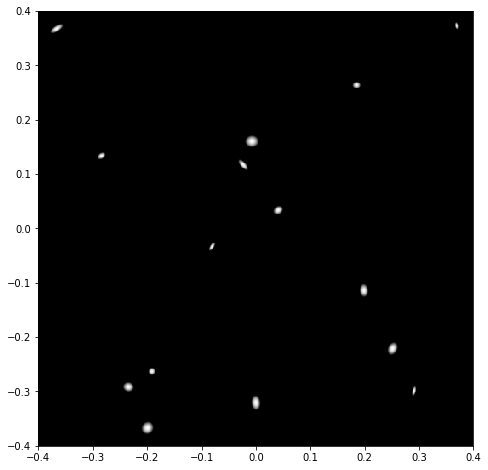

In [7]:
# Here we're going to create a plot containing all the sources. We can't do
# this with a single call to plotImagePlane, as each source is at a different
# redshift. To be able to combine the results from all sources, we'll specify
# a 'processRenderPixels' argument which will receive the pixels for a
# particular source each time, and in the specified function 'processPixels'
# we can then combine the different rendered situations
plt.figure(figsize=(8,8))

# To avoid an error about a global variable, we're not going to use a single
# variable to assign to, but we're going to store things inside the first
# element of an array. That way, the 'finalGrid' variable itself will still
# be the same list, only its contents will change.
finalGrid = [ None ]
def processPixels(x):
    finalGrid[0] = x if finalGrid[0] is None else finalGrid[0] + x
    return finalGrid[0]


# This is the situation that we'll be looking at; we'll set the source redshift
# to a specific value for each source later. The lens plane mapping that's 
# calculated can be reused for each source, and this approach takes advantage
# of this. (much better than just calculating a completely new LensInfo inside
# the loop each time)
lensInfo = plotutil.LensInfo(lens, size=0.8*ANGLE_ARCMIN, zd=zd)

# Iterate over the sources, and add their shape to the plot
for s in sources:
    shape = images.EllipticalSource([s["x"], s["y"]], s["radius"], s["ecc"], s["angle"], fade=True)
    lensInfo.setSourceRedshift(s["z"])
    plotutil.plotImagePlane(lensInfo, [shape], plotCaustics=False, plotCriticalLines=False, plotImages=False,
                            processRenderPixels=processPixels, sourceRgb=(1,1,1))
    

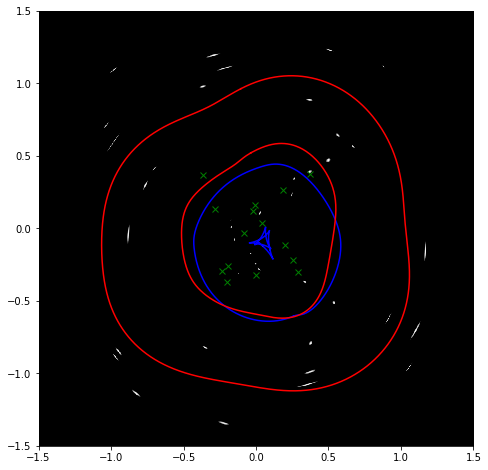

In [8]:
# Here we'll do something similar for the images; as they come from sources
# with different redshifts, we'll also combine them using a similar
# 'processPixels' function. This version also keeps track of the last
# rendered image plane that was passed (so that we don't need to re-calculate
# that either)
#
# In the loop below, we'll not only plot the images, we'll also keep track
# of the pixels that belong to the images. These can be used for the
# inversion.
plt.figure(figsize=(8,8))

finalGrid = [ None ]
lastPlane = [ None ]
def processPixels(x):
    finalGrid[0] = x if finalGrid[0] is None else finalGrid[0] + x
    lastPlane[0] = x
    return finalGrid[0]

lensInfo = plotutil.LensInfo(lens, size=3*ANGLE_ARCMIN, zd=zd, numxy=1023)

for i in range(len(sources)):
    s = sources[i]
    s['num'] = i+1
    
    # This adds to the plot
    shape = images.EllipticalSource([s["x"], s["y"]], s["radius"], s["ecc"], s["angle"], fade=True)
    lensInfo.setSourceRedshift(s["z"])
    plotutil.plotImagePlane(lensInfo, [shape], plotCaustics=False, plotCriticalLines=False, plotSources=False,
                            processRenderPixels=processPixels)
    
    # This gets the image pixel coordinates based on the image plane
    # that was just rendered. We only need one color component in this
    # function, we'll use 0 for this (all three are the same for gray
    # scale)
    s['segs'] = lensInfo.getImagePlane().segment(lastPlane[0][:,:,0])
    
# This will simply plot the critical lines and caustics
lensInfo.setSourceRedshift(2.5)
plotutil.plotImagePlane(lensInfo, processRenderPixels=processPixels)

# Also plot each source position
for s in sources:
    plt.plot([s["x"]/ANGLE_ARCMIN], [ s["y"]/ANGLE_ARCMIN ], 'x', color='green')

In [9]:
# Let's create a FITS file for these images
w, h = lensInfo.getTopRight()-lensInfo.getBottomLeft()
g = finalGrid[0][:,:,0]
f = plotutil.createEmptyFits(g.shape[1], g.shape[0], w/ANGLE_DEGREE, h/ANGLE_DEGREE, 0, 0, 
                             g.shape[1]/2.0, g.shape[0]/2.0)

f[0].data = np.fliplr(g) # Need to flip this, RA coords go the other way!
f.writeto(open("images.fits", "wb"))

In [10]:
# Let's also create a file that contains the image positions, so that
# for an inversion we'll be able to find out which images belong together.
with open("paper2006images.txt", "wt") as f:
    f.write("# ID    X      Y    z  \n")
    f.write("#----------------------\n")
    for s in sources:
        segs = s['segs']

        for i in range(len(segs)):
            img = segs[i]
            x, y = np.average(np.array(img),0)
            f.write("{:2d}.{} {:6.2f} {:6.2f} {:4.2f}\n".format(s['num'], i+1, 
                                                                x/ANGLE_ARCSEC, y/ANGLE_ARCSEC, s['z']))

        f.write("\n")
